# 3 Exploratory Data Analysis - "Of Genomes And Genetics"

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

## Load The Data

In [2]:
cleaned_data = pd.read_csv('data/cleaned_train.csv')

In [3]:
print(cleaned_data.head())

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           Yes           Yes                4.720703            Johanna   

  Father's name  Mother's age  ...  Birth defects  \
0         Larre           NaN  ...           

## Build Data Profiles and Tables

In [4]:
print(cleaned_data.describe())

        Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  22083.000000            22083.000000  16047.000000  16097.000000   
mean       6.975819                4.898871     34.526454     41.972852   
std        4.177581                0.199663      9.852598     13.035501   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763109     26.000000     31.000000   
50%        7.000000                4.899399     35.000000     42.000000   
75%       10.000000                5.033830     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min 

In [5]:
for column in cleaned_data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:")
    print(cleaned_data[column].value_counts())



Unique values in Patient Id:
PID0x6418    1
PID0x41cf    1
PID0x5b6c    1
PID0x42a8    1
PID0x869f    1
            ..
PID0x11ec    1
PID0x4737    1
PID0x8a5b    1
PID0x33b2    1
PID0x9332    1
Name: Patient Id, Length: 22083, dtype: int64

Unique values in Genes in mother's side:
Yes    13143
No      8940
Name: Genes in mother's side, dtype: int64

Unique values in Inherited from father:
No     13133
Yes     8644
Name: Inherited from father, dtype: int64

Unique values in Maternal gene:
Yes    13457
No      8626
Name: Maternal gene, dtype: int64

Unique values in Paternal gene:
No     12508
Yes     9575
Name: Paternal gene, dtype: int64

Unique values in Patient First Name:
James        420
John         372
Robert       355
Mary         329
Michael      321
            ... 
Sharice        1
Shasta         1
Maryalice      1
Roxann         1
Cathrine       1
Name: Patient First Name, Length: 2524, dtype: int64

Unique values in Father's name:
Clardie       6
Sager         6
Daiquon   

## Explore Data Relationships

/var/folders/xv/zbhf3_h53h508qrw49g2ty1h0000gn/T/ipykernel_14187/2295830245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")


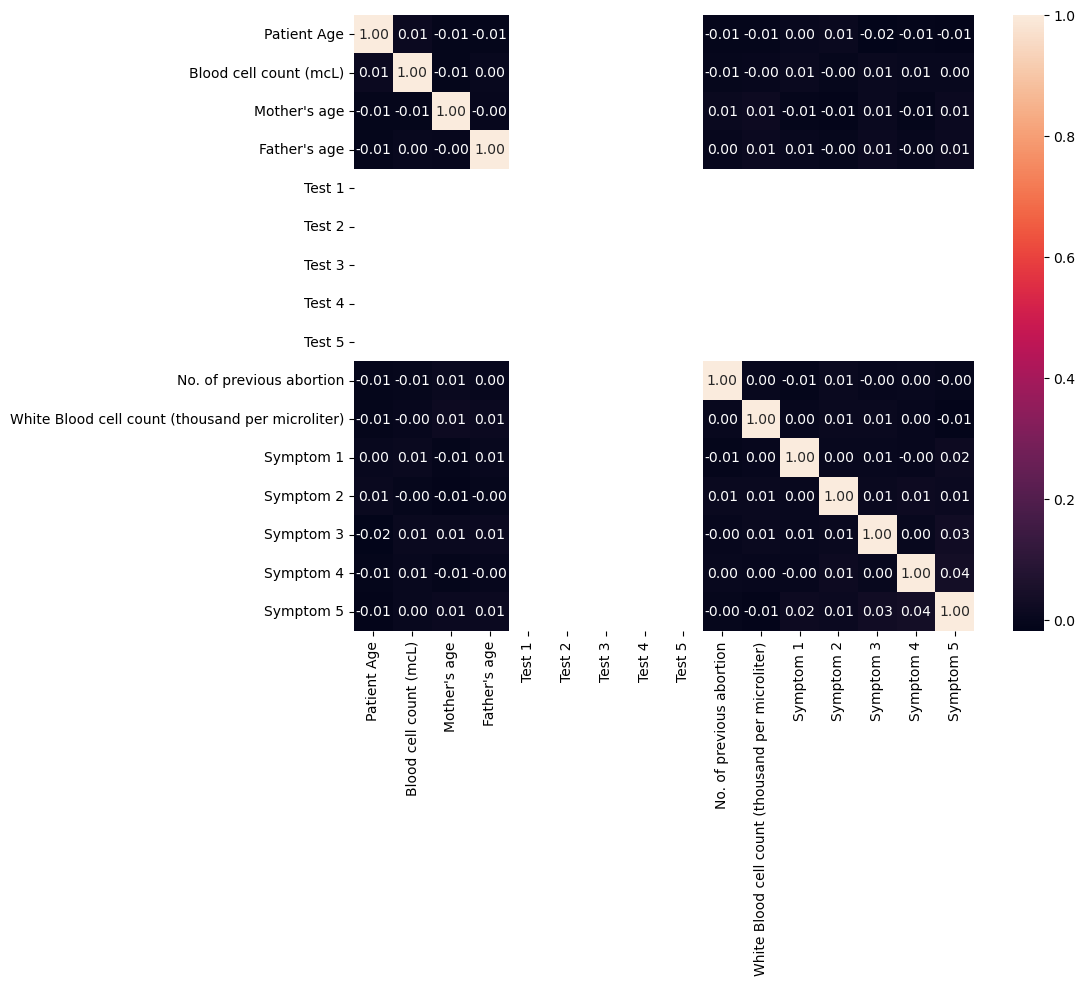

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_data.corr(), annot=True, fmt=".2f")
plt.show()

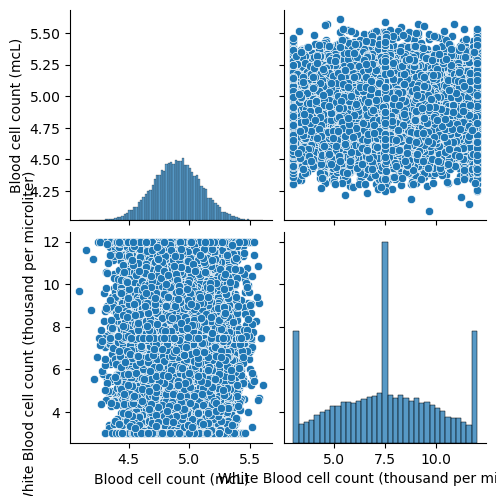

In [7]:
sns.pairplot(cleaned_data[['Blood cell count (mcL)', 'White Blood cell count (thousand per microliter)', 'Genetic Disorder']])
plt.show()

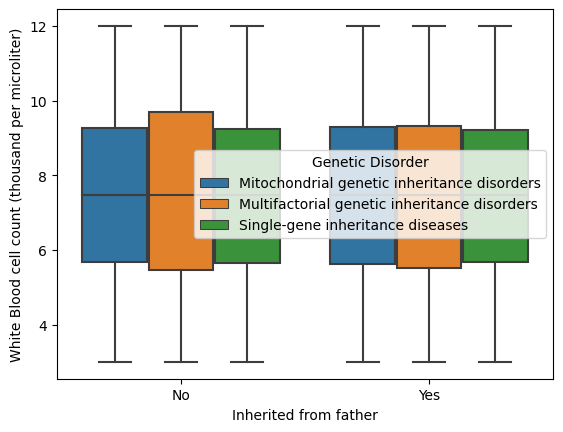

In [8]:
sns.boxplot(x='Inherited from father', y='White Blood cell count (thousand per microliter)', hue='Genetic Disorder', data=cleaned_data)
plt.show()

## Feature Selection and Engineering

In [9]:
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=["Genes in mother's side", "Inherited from father"], drop_first=True)

In [10]:
scaler = StandardScaler()
cleaned_data['Normalized White Blood Cell Count'] = scaler.fit_transform(cleaned_data[['White Blood cell count (thousand per microliter)']])
print(cleaned_data.head())

  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           Yes           Yes                4.720703            Johanna   

  Father's name  Mother's age  ...  \
0         Larre           NaN  ...   
1        Brycen       

## Inferential Statistics

In [11]:
from scipy import stats

group1 = cleaned_data[cleaned_data['Genetic Disorder'] == 'Disorder Type 1']['White Blood cell count (thousand per microliter)']
group2 = cleaned_data[cleaned_data['Genetic Disorder'] == 'Disorder Type 2']['White Blood cell count (thousand per microliter)']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: nan, P-value: nan
